# Peak 분석하기위한 패키지 

- seewave
- signal
- pracma
- changepoint

In [1]:
library(seewave)
library(signal)
library(pracma)


Attaching package: 'signal'


The following object is masked from 'package:seewave':

    unwrap


The following objects are masked from 'package:stats':

    filter, poly



Attaching package: 'pracma'


The following objects are masked from 'package:signal':

    conv, ifft, interp1, pchip, polyval, roots




## 1. Peak 찾기

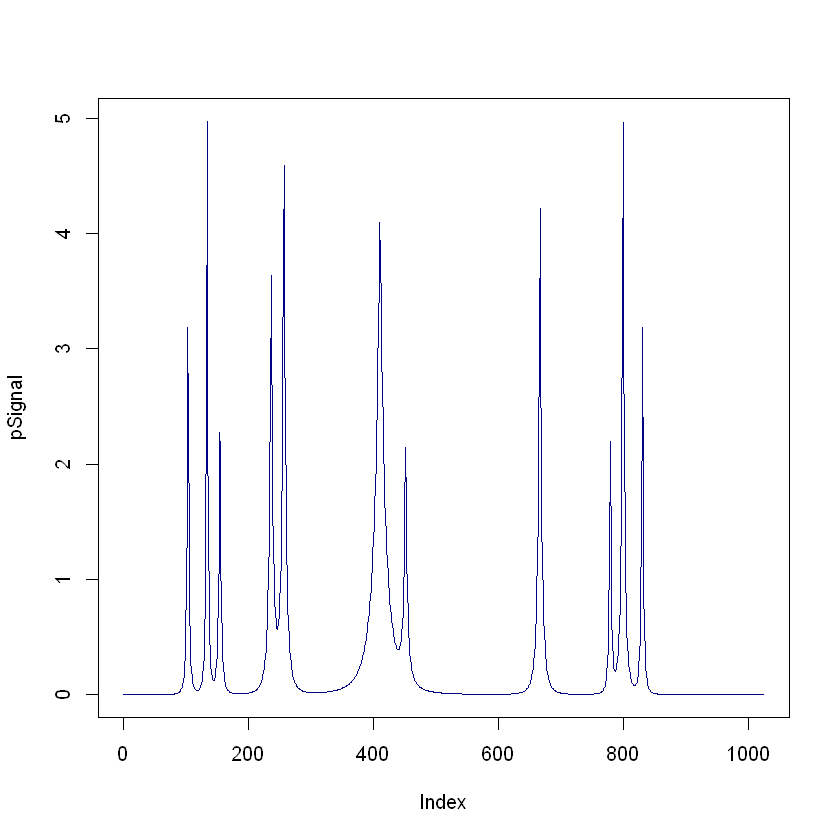

In [2]:
x<-seq(0,1,len=1024)
pos<-c(0.1,0.13,0.15,0.23,0.25,0.40,0.44,0.65,0.76,0.78,0.81)
hgt<-c(4,5,3,4,5,4.2,2.1,4.3,3.1,5.1,4.2)
wdt<-c(0.005,0.005,0.006,0.01,0.01,0.03,0.01,0.01,0.005,0.008,0.005)
pSignal<-numeric(length(x))
for (i in seq(along=pos)){
    pSignal<-pSignal+hgt[i]/(1+abs((x-pos[i])/wdt[i]))^4
}
plot(pSignal, type='l', col='navy')

In [3]:
# peak 찾기 ->findpeaks 함수
# npeaks : 찾을 peak개수
# threshold : peak로 인정할 임계값
x<-findpeaks(pSignal, npeaks=3, threshold=4, sortstr=TRUE)
x

# 결과값 1번째칼럼 : 피크크기, 2번째칼럼 : x축위치

4.972146,134,118,144
4.960051,799,786,817
4.590829,257,246,306


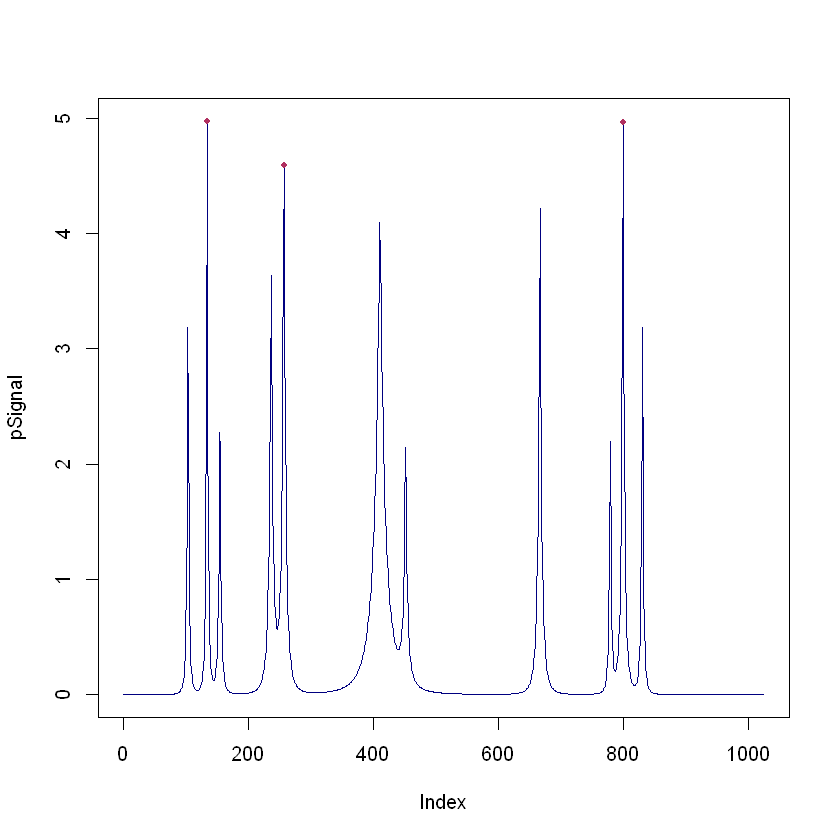

In [4]:
# peak 점 시각화하기 -> plot에다가 points함수 사용
# points(피크x축위치, 피크크기, pch, col='색깔')
plot(pSignal, type='l', col='navy')
points(x[,2], x[,1], pch=20, col='maroon')

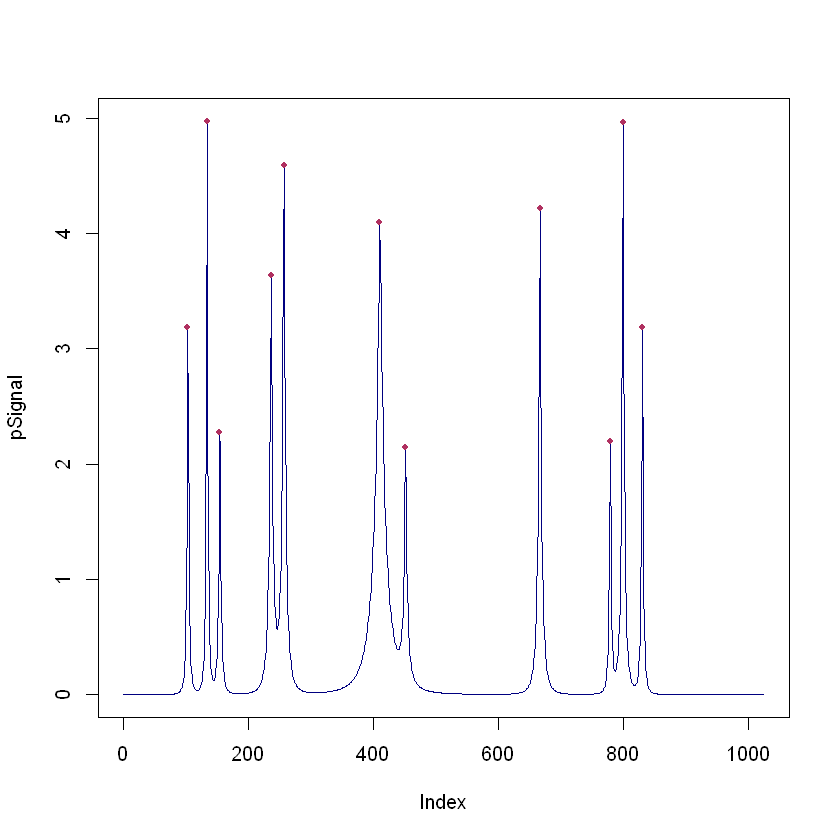

In [5]:
y<-findpeaks(pSignal)
plot(pSignal, type='l', col='navy')
points(y[,2],y[,1], pch=20, col='maroon')

## Peak 간격 시각화

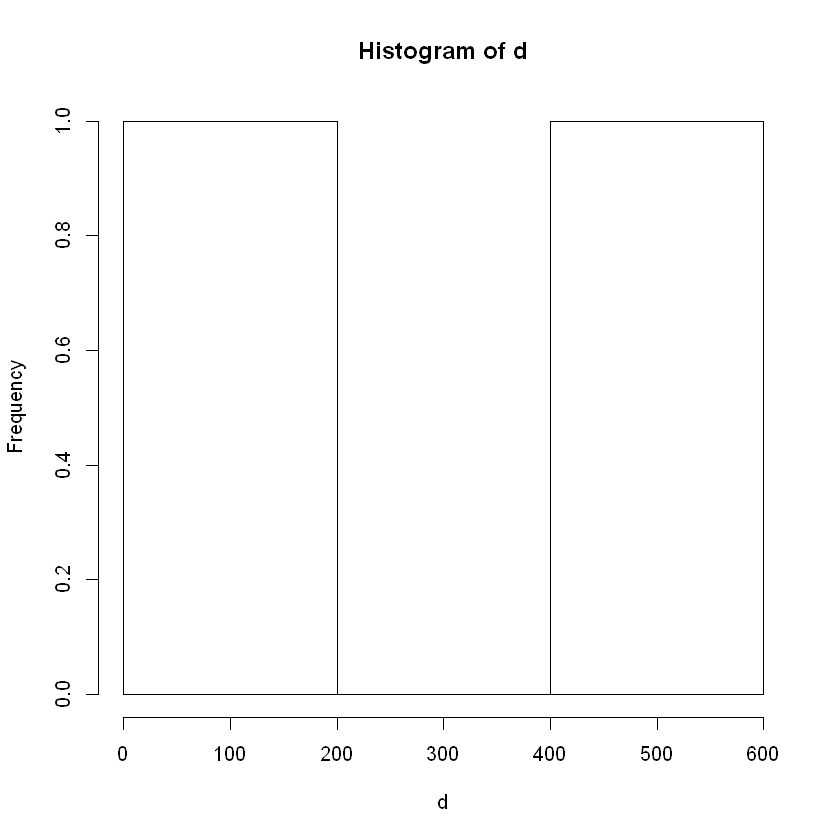

In [6]:
# 피크 x축위치를 sort한 차이를 구하면서 히스토그램 그리기
# diff함수 사용
y<-findpeaks(pSignal)
            # 피크 x축위치
d<-diff(sort(x[,2]))
hist(d)

## Peak값이 얼마나 극단적인지를 나타내는 척도 = 파고율

- 참고로 파고율=1 이면 peak가 없다는 의미
- 공식 : **``peak값 / 신호의 rms값``**
- rms()함수는 seewave 패키지에 있음

In [7]:
c<-x[,1]/rms(pSignal)
c

# 파고율 max값도 출력가능
d<-max(x[,1])/rms(pSignal)
d

[1] 6.864055 6.847358 6.337648

[1] 6.864055

- PAPR : 피크들끼리 차이가 얼마나 큰지 비교하기 위함(Peak to Average Power Ratio)
- 공식 : **``peak제곱 / rms제곱``**

## 추세제거하기

- polyfit 함수로 n차원 다항 함수만들기 - polyfit(x,y,n차원)
- polyfit 함수를 이용해 n차원 함수로 데이터의 추세를 나타냄
- 원본데이터 - 추세데이터 

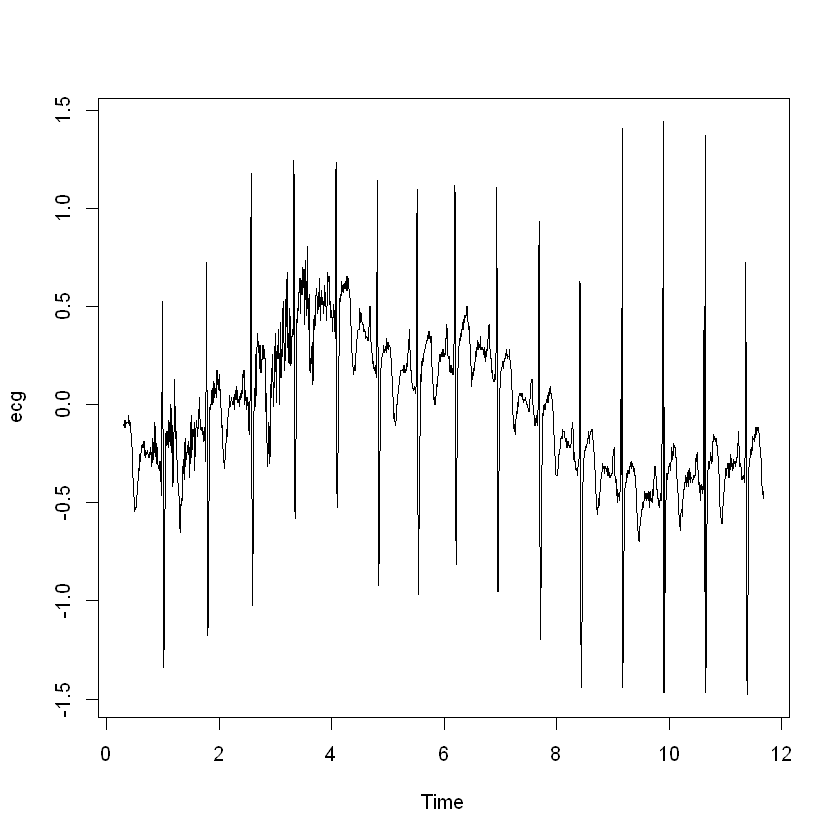

In [8]:
# 라이브러지 내장 ECG 데이터로드
library(ade4)
data(ecg)
plot(ecg)

In [9]:
a<-polyfit(1:length(ecg), ecg, 6)
a
ecg

[1]  9.008457e-19 -6.336388e-15  1.780220e-11 -2.409933e-08  1.430752e-05
[6] -2.123783e-03 -1.995385e-01

A Time Series:
   [1] -0.104773 -0.093136 -0.081500 -0.116409 -0.081500 -0.116409 -0.104773
   [8] -0.093136 -0.093136 -0.093136 -0.093136 -0.093136 -0.093136 -0.093136
  [15] -0.058227 -0.093136 -0.104773 -0.093136 -0.081500 -0.093136 -0.093136
  [22] -0.104773 -0.139682 -0.151318 -0.162955 -0.197864 -0.232773 -0.267682
  [29] -0.337500 -0.407318 -0.418955 -0.453864 -0.488773 -0.500409 -0.535318
  [36] -0.546955 -0.535318 -0.535318 -0.523682 -0.523682 -0.488773 -0.477136
  [43] -0.442227 -0.442227 -0.407318 -0.372409 -0.360773 -0.325864 -0.337500
  [50] -0.337500 -0.267682 -0.256045 -0.256045 -0.290955 -0.256045 -0.244409
  [57] -0.209500 -0.209500 -0.221136 -0.221136 -0.221136 -0.186227 -0.221136
  [64] -0.186227 -0.221136 -0.221136 -0.186227 -0.256045 -0.267682 -0.232773
  [71] -0.244409 -0.244409 -0.256045 -0.256045 -0.244409 -0.232773 -0.232773
  [78] -0.267682 -0.256045 -0.267682 -0.256045 -0.267682 -0.256045 -0.244409
  [85] -0.256045 -0.221136 -0.232773 -0.244409 -0.279318 -0.314227 -0.279318
  [92] -0.244409 -0.174591 -0.209500 -0.279318 -0.209500 -0.174591 -0.244409
  [99] -0.104773 -0.093136 -0.128045 -0.162955 -0.232773 -0.302591 -0.232773
 [106] -0.197864 -0.232773 -0.267682 -0.302591 -0.314227 -0.325864 -0.325864
 [113] -0.290955 -0.302591 -0.337500 -0.325864 -0.290955 -0.325864 -0.325864
 [120] -0.465500 -0.395682 -0.151318  0.279273  0.523636  0.279273 -0.523682
 [127] -1.338227 -1.268409 -1.233500 -0.989136 -0.744773 -0.605136 -0.465500
 [134] -0.221136 -0.151318 -0.139682 -0.209500 -0.174591 -0.139682 -0.151318
 [141] -0.186227 -0.221136 -0.081500 -0.093136 -0.128045 -0.093136 -0.162955
 [148] -0.174591 -0.209500 -0.069864 -0.000045 -0.034955 -0.104773 -0.244409
 [155] -0.104773 -0.174591 -0.418955 -0.384045 -0.349136 -0.209500 -0.069864
 [162]  0.058182  0.128000  0.058182 -0.069864 -0.104773 -0.174591 -0.139682
 [169] -0.174591 -0.244409 -0.314227 -0.325864 -0.360773 -0.430591 -0.465500
 [176] -0.430591 -0.500409 -0.570227 -0.581864 -0.616773 -0.651682 -0.581864
 [183] -0.512045 -0.500409 -0.512045 -0.477136 -0.488773 -0.349136 -0.314227
 [190] -0.349136 -0.279318 -0.314227 -0.384045 -0.349136 -0.279318 -0.209500
 [197] -0.174591 -0.244409 -0.314227 -0.244409 -0.279318 -0.244409 -0.244409
 [204] -0.209500 -0.221136 -0.256045 -0.186227 -0.256045 -0.221136 -0.232773
 [211] -0.372409 -0.302591 -0.302591 -0.267682 -0.128045 -0.058227 -0.128045
 [218] -0.267682 -0.197864 -0.128045 -0.139682 -0.128045 -0.162955 -0.162955
 [225] -0.093136 -0.128045 -0.197864 -0.337500 -0.197864 -0.162955 -0.128045
 [232] -0.116409 -0.081500 -0.116409 -0.116409 -0.128045 -0.162955 -0.093136
 [239] -0.023318 -0.058227  0.000000  0.034909  0.000000 -0.058227 -0.093136
 [246] -0.128045 -0.116409 -0.128045 -0.116409 -0.116409 -0.151318 -0.116409
 [253] -0.151318 -0.139682 -0.151318 -0.186227 -0.116409 -0.116409 -0.116409
 [260] -0.151318 -0.221136 -0.290955 -0.151318  0.279273  0.721455  0.477091
 [267] -0.325864 -1.140409 -1.175318 -1.105500 -0.861136 -0.616773 -0.372409
 [274] -0.232773 -0.093136 -0.023318  0.000000 -0.023318  0.000000  0.000000
 [281]  0.034909  0.069818  0.000000  0.011636  0.081455  0.011636  0.081455
 [288]  0.116364  0.104727  0.034909  0.034909  0.069818  0.069818  0.081455
 [295]  0.069818  0.034909  0.174545  0.174545  0.104727  0.174545  0.139636
 [302]  0.128000  0.116364  0.081455  0.069818  0.139636  0.151273  0.116364
 [309]  0.046545  0.046545  0.011636 -0.046591 -0.081500 -0.116409 -0.104773
 [316] -0.139682 -0.209500 -0.244409 -0.279318 -0.279318 -0.314227 -0.325864
 [323] -0.290955 -0.302591 -0.267682 -0.267682 -0.232773 -0.162955 -0.162955
 [330] -0.128045 -0.162955 -0.151318 -0.081500 -0.046591 -0.034955 -0.023318
 [337] -0.011682  0.046545  0.011636 -0.011682  0.011636 -0.011682  0.011636
 [344]  0.023273  0.023273  0.034909  0.000000  0.011636  0.011636  0.000000
 [351]  0.034909  0.034909  0.000000  0.034909 -0.023318  0.034909  0.069818
 [358]  0.058182  0.023273  0.023273  0.058182  0.093091  

In [10]:
# polyfit으로 추정된 식을 이용해서 값으로 바꿈 -> polyval함수
fit_y<-polyval(a,1:length(ecg))
fit_y

[1] -0.2016479707 -0.2037289999 -0.2057817023 -0.2078062215 -0.2098027007
   [6] -0.2117712824 -0.2137121090 -0.2156253222 -0.2175110636 -0.2193694740
  [11] -0.2212006941 -0.2230048640 -0.2247821234 -0.2265326117 -0.2282564677
  [16] -0.2299538300 -0.2316248366 -0.2332696251 -0.2348883328 -0.2364810965
  [21] -0.2380480526 -0.2395893371 -0.2411050856 -0.2425954333 -0.2440605149
  [26] -0.2455004648 -0.2469154169 -0.2483055048 -0.2496708616 -0.2510116201
  [31] -0.2523279125 -0.2536198707 -0.2548876263 -0.2561313104 -0.2573510537
  [36] -0.2585469865 -0.2597192387 -0.2608679398 -0.2619932189 -0.2630952047
  [41] -0.2641740255 -0.2652298092 -0.2662626834 -0.2672727751 -0.2682602110
  [46] -0.2692251176 -0.2701676207 -0.2710878459 -0.2719859183 -0.2728619627
  [51] -0.2737161034 -0.2745484644 -0.2753591693 -0.2761483414 -0.2769161033
  [56] -0.2776625775 -0.2783878862 -0.2790921508 -0.2797754927 -0.2804380328
  [61] -0.2810798916 -0.2817011891 -0.2823020452 -0.2828825791 -0.2834429098
  [66] -0.2839831560 -0.2845034357 -0.2850038670 -0.2854845672 -0.2859456534
  [71] -0.2863872422 -0.2868094502 -0.2872123931 -0.2875961865 -0.2879609457
  [76] -0.2883067855 -0.2886338204 -0.2889421644 -0.2892319313 -0.2895032343
  [81] -0.2897561866 -0.2899909006 -0.2902074887 -0.2904060627 -0.2905867341
  [86] -0.2907496140 -0.2908948133 -0.2910224424 -0.2911326112 -0.2912254296
  [91] -0.2913010067 -0.2913594516 -0.2914008729 -0.2914253789 -0.2914330773
  [96] -0.2914240758 -0.2913984814 -0.2913564011 -0.2912979412 -0.2912232078
 [101] -0.2911323068 -0.2910253434 -0.2909024228 -0.2907636496 -0.2906091280
 [106] -0.2904389622 -0.2902532557 -0.2900521119 -0.2898356335 -0.2896039233
 [111] -0.2893570833 -0.2890952156 -0.2888184217 -0.2885268027 -0.2882204594
 [116] -0.2878994925 -0.2875640019 -0.2872140876 -0.2868498491 -0.2864713853
 [121] -0.2860787952 -0.2856721771 -0.2852516292 -0.2848172492 -0.2843691346
 [126] -0.2839073824 -0.2834320894 -0.2829433520 -0.2824412662 -0.2819259280
 [131] -0.2813974325 -0.2808558749 -0.2803013500 -0.2797339522 -0.2791537754
 [136] -0.2785609136 -0.2779554600 -0.2773375079 -0.2767071498 -0.2760644783
 [141] -0.2754095855 -0.2747425631 -0.2740635025 -0.2733724950 -0.2726696312
 [146] -0.2719550018 -0.2712286967 -0.2704908058 -0.2697414187 -0.2689806245
 [151] -0.2682085120 -0.2674251699 -0.2666306863 -0.2658251491 -0.2650086459
 [156] -0.2641812639 -0.2633430902 -0.2624942113 -0.2616347135 -0.2607646829
 [161] -0.2598842051 -0.2589933655 -0.2580922492 -0.2571809408 -0.2562595249
 [166] -0.2553280855 -0.2543867065 -0.2534354713 -0.2524744632 -0.2515037650
 [171] -0.2505234592 -0.2495336283 -0.2485343541 -0.2475257182 -0.2465078020
 [176] -0.2454806867 -0.2444444528 -0.2433991808 -0.2423449510 -0.2412818430
 [181] -0.2402099364 -0.2391293105 -0.2380400442 -0.2369422161 -0.2358359046
 [186] -0.2347211876 -0.2335981429 -0.2324668479 -0.2313273799 -0.2301798155
 [191] -0.2290242314 -0.2278607039 -0.2266893088 -0.2255101219 -0.2243232185
 [196] -0.2231286737 -0.2219265623 -0.2207169588 -0.2194999375 -0.2182755721
 [201] -0.2170439364 -0.2158051038 -0.2145591471 -0.2133061394 -0.2120461529
 [206] -0.2107792599 -0.2095055324 -0.2082250419 -0.2069378599 -0.2056440573
 [211] -0.2043437049 -0.2030368733 -0.2017236326 -0.2004040528 -0.1990782036
 [216] -0.1977461542 -0.1964079739 -0.1950637314 -0.1937134953 -0.1923573339
 [221] -0.1909953150 -0.1896275066 -0.1882539758 -0.1868747901 -0.1854900161
 [226] -0.1840997206 -0.1827039699 -0.1813028301 -0.1798963669 -0.1784846459
 [231] -0.1770677324 -0.1756456913 -0.1742185874 -0.1727864851 -0.1713494485
 [236] -0.1699075417 -0.1684608283 -0.1670093716 -0.1655532348 -0.1640924807
 [241] -0.1626271719 -0.1611573708 -0.1596831394 -0.1582045395 -0.1567216326
 [246] -0.1552344801 -0.1537431430 -0.1522476819 -0.1507481575 -0.1492446299
 [251] -0.1477371592 -0.1462258051 -0.1447106269 -0.1431916841 -0.1416690354
 [256] -0.1401427397 -0.1386128553 -0.1370794405 -0.1355425532 -0.1340022510

In [11]:
library(ggplot2)
ecg_d<-as.data.frame(ecg)
ecg_d

x
<ts>
-0.104773
-0.093136
-0.081500
-0.116409
-0.081500
-0.116409
-0.104773
-0.093136
-0.093136


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



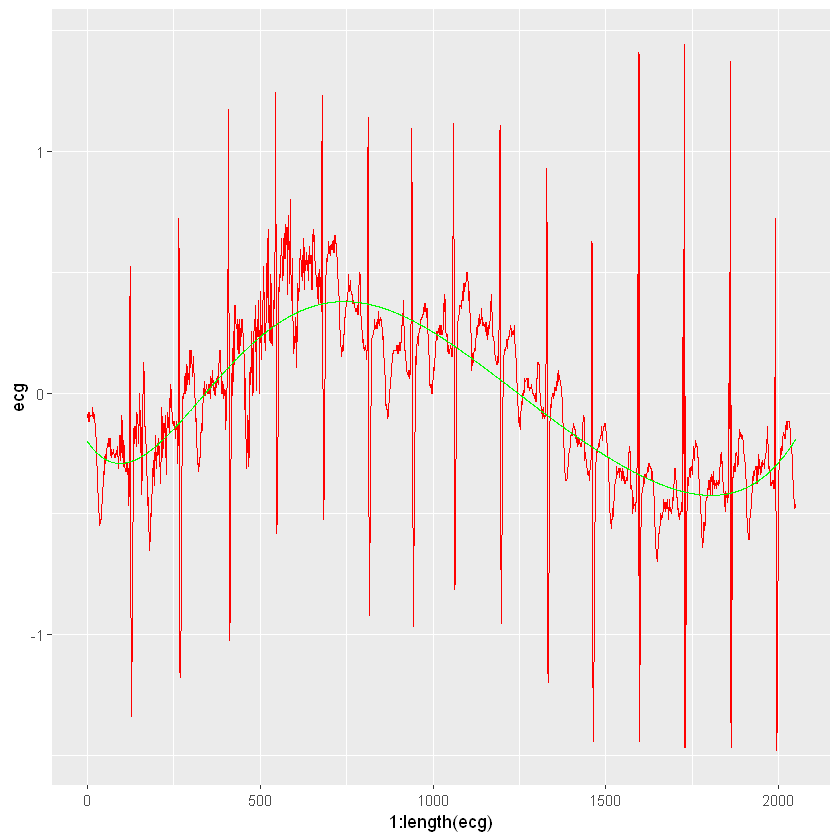

In [44]:
# 왜 실행안되지..?
ecg_d<-as.data.frame(ecg)
ggplot(ecg_d, aes(1:length(ecg)))+geom_line(aes(y=ecg), colour='red')+geom_line(aes(y=fit_y),colour='green')

In [42]:
fit_y

[1] -0.2016479707 -0.2037289999 -0.2057817023 -0.2078062215 -0.2098027007
   [6] -0.2117712824 -0.2137121090 -0.2156253222 -0.2175110636 -0.2193694740
  [11] -0.2212006941 -0.2230048640 -0.2247821234 -0.2265326117 -0.2282564677
  [16] -0.2299538300 -0.2316248366 -0.2332696251 -0.2348883328 -0.2364810965
  [21] -0.2380480526 -0.2395893371 -0.2411050856 -0.2425954333 -0.2440605149
  [26] -0.2455004648 -0.2469154169 -0.2483055048 -0.2496708616 -0.2510116201
  [31] -0.2523279125 -0.2536198707 -0.2548876263 -0.2561313104 -0.2573510537
  [36] -0.2585469865 -0.2597192387 -0.2608679398 -0.2619932189 -0.2630952047
  [41] -0.2641740255 -0.2652298092 -0.2662626834 -0.2672727751 -0.2682602110
  [46] -0.2692251176 -0.2701676207 -0.2710878459 -0.2719859183 -0.2728619627
  [51] -0.2737161034 -0.2745484644 -0.2753591693 -0.2761483414 -0.2769161033
  [56] -0.2776625775 -0.2783878862 -0.2790921508 -0.2797754927 -0.2804380328
  [61] -0.2810798916 -0.2817011891 -0.2823020452 -0.2828825791 -0.2834429098
  [66] -0.2839831560 -0.2845034357 -0.2850038670 -0.2854845672 -0.2859456534
  [71] -0.2863872422 -0.2868094502 -0.2872123931 -0.2875961865 -0.2879609457
  [76] -0.2883067855 -0.2886338204 -0.2889421644 -0.2892319313 -0.2895032343
  [81] -0.2897561866 -0.2899909006 -0.2902074887 -0.2904060627 -0.2905867341
  [86] -0.2907496140 -0.2908948133 -0.2910224424 -0.2911326112 -0.2912254296
  [91] -0.2913010067 -0.2913594516 -0.2914008729 -0.2914253789 -0.2914330773
  [96] -0.2914240758 -0.2913984814 -0.2913564011 -0.2912979412 -0.2912232078
 [101] -0.2911323068 -0.2910253434 -0.2909024228 -0.2907636496 -0.2906091280
 [106] -0.2904389622 -0.2902532557 -0.2900521119 -0.2898356335 -0.2896039233
 [111] -0.2893570833 -0.2890952156 -0.2888184217 -0.2885268027 -0.2882204594
 [116] -0.2878994925 -0.2875640019 -0.2872140876 -0.2868498491 -0.2864713853
 [121] -0.2860787952 -0.2856721771 -0.2852516292 -0.2848172492 -0.2843691346
 [126] -0.2839073824 -0.2834320894 -0.2829433520 -0.2824412662 -0.2819259280
 [131] -0.2813974325 -0.2808558749 -0.2803013500 -0.2797339522 -0.2791537754
 [136] -0.2785609136 -0.2779554600 -0.2773375079 -0.2767071498 -0.2760644783
 [141] -0.2754095855 -0.2747425631 -0.2740635025 -0.2733724950 -0.2726696312
 [146] -0.2719550018 -0.2712286967 -0.2704908058 -0.2697414187 -0.2689806245
 [151] -0.2682085120 -0.2674251699 -0.2666306863 -0.2658251491 -0.2650086459
 [156] -0.2641812639 -0.2633430902 -0.2624942113 -0.2616347135 -0.2607646829
 [161] -0.2598842051 -0.2589933655 -0.2580922492 -0.2571809408 -0.2562595249
 [166] -0.2553280855 -0.2543867065 -0.2534354713 -0.2524744632 -0.2515037650
 [171] -0.2505234592 -0.2495336283 -0.2485343541 -0.2475257182 -0.2465078020
 [176] -0.2454806867 -0.2444444528 -0.2433991808 -0.2423449510 -0.2412818430
 [181] -0.2402099364 -0.2391293105 -0.2380400442 -0.2369422161 -0.2358359046
 [186] -0.2347211876 -0.2335981429 -0.2324668479 -0.2313273799 -0.2301798155
 [191] -0.2290242314 -0.2278607039 -0.2266893088 -0.2255101219 -0.2243232185
 [196] -0.2231286737 -0.2219265623 -0.2207169588 -0.2194999375 -0.2182755721
 [201] -0.2170439364 -0.2158051038 -0.2145591471 -0.2133061394 -0.2120461529
 [206] -0.2107792599 -0.2095055324 -0.2082250419 -0.2069378599 -0.2056440573
 [211] -0.2043437049 -0.2030368733 -0.2017236326 -0.2004040528 -0.1990782036
 [216] -0.1977461542 -0.1964079739 -0.1950637314 -0.1937134953 -0.1923573339
 [221] -0.1909953150 -0.1896275066 -0.1882539758 -0.1868747901 -0.1854900161
 [226] -0.1840997206 -0.1827039699 -0.1813028301 -0.1798963669 -0.1784846459
 [231] -0.1770677324 -0.1756456913 -0.1742185874 -0.1727864851 -0.1713494485
 [236] -0.1699075417 -0.1684608283 -0.1670093716 -0.1655532348 -0.1640924807
 [241] -0.1626271719 -0.1611573708 -0.1596831394 -0.1582045395 -0.1567216326
 [246] -0.1552344801 -0.1537431430 -0.1522476819 -0.1507481575 -0.1492446299
 [251] -0.1477371592 -0.1462258051 -0.1447106269 -0.1431916841 -0.1416690354
 [256] -0.1401427397 -0.1386128553 -0.1370794405 -0.1355425532 -0.1340022510

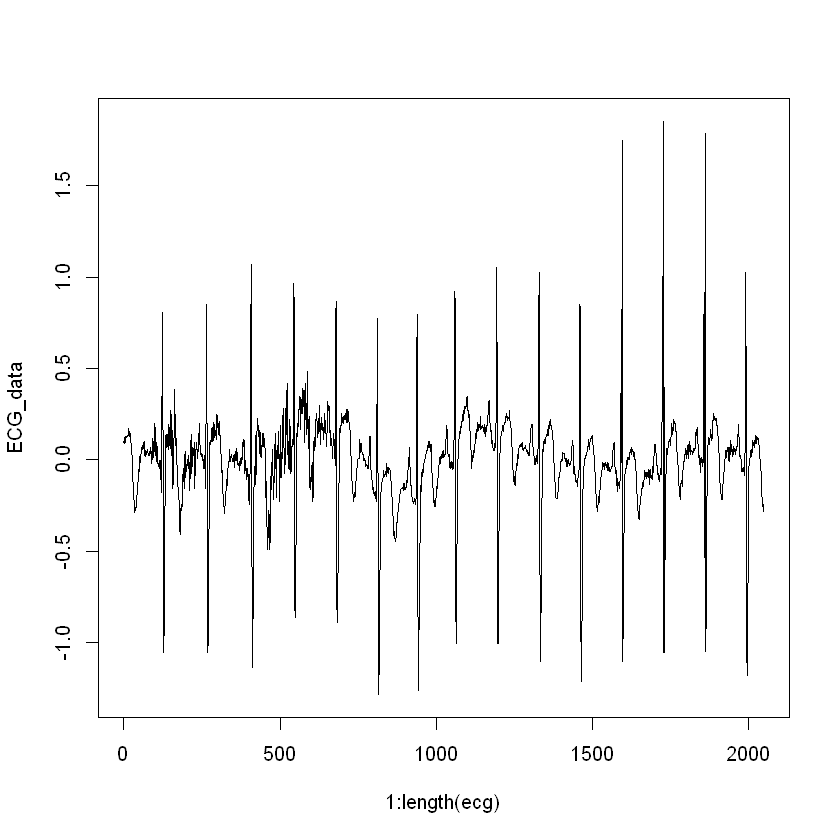

In [13]:
# 추세제거함수
ECG_data<-ecg-fit_y
plot(1:length(ecg), ECG_data,'l')

## 반복 Peak 찾기 => QRS파찾기 

- P파에 이어지는 **최초의** 하향파를 Q파
- 최초의 **상향파(Peak)** 를 R파
- **R파에 이어지는 하향파** 를 S파


In [14]:
# R파 찾기 -> 0.5로 임계치 임의로 설정
# ECG_data를 수치형으로 바꿔주는거 잊지말기!
r<-findpeaks(as.numeric(ECG_data), threshold=0.5)
r

0.8084532,124,120,127
0.8477065,265,262,269
1.0705691,408,404,412
0.9650402,544,541,548
0.8648199,680,676,683
0.7726393,812,808,815
0.7931637,939,932,942
0.9204058,1059,1055,1063
1.0502128,1194,1189,1197
1.0225057,1329,1323,1333
0.8514645,1459,1456,1463


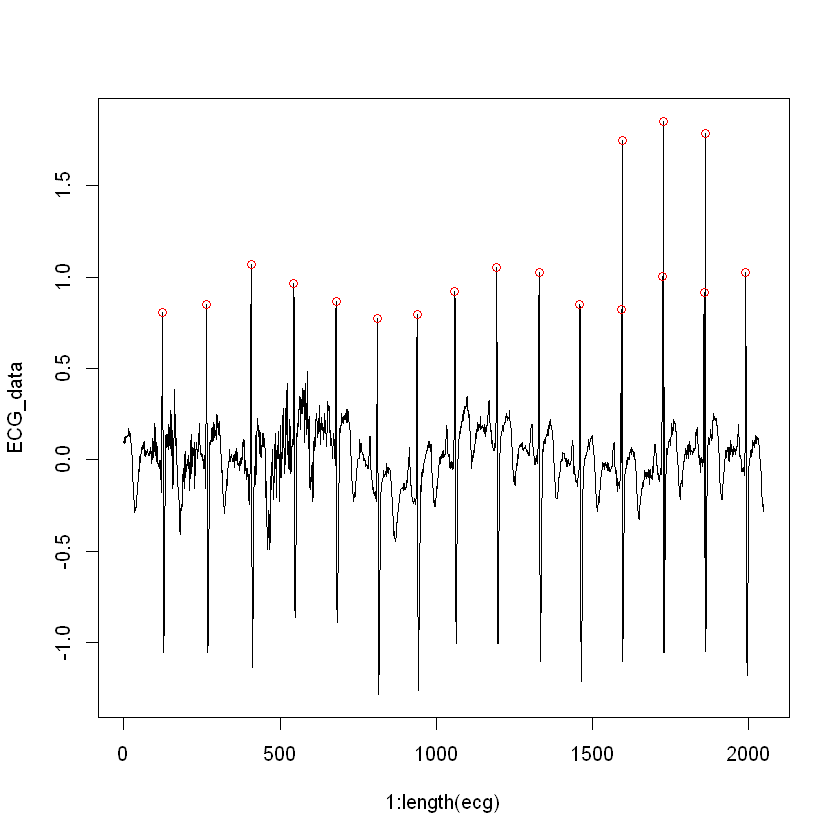

In [15]:
# R파 시각화
plot(1:length(ecg), ECG_data, 'l')
par(new=TRUE)
points(r[,2],r[,1],col='red')

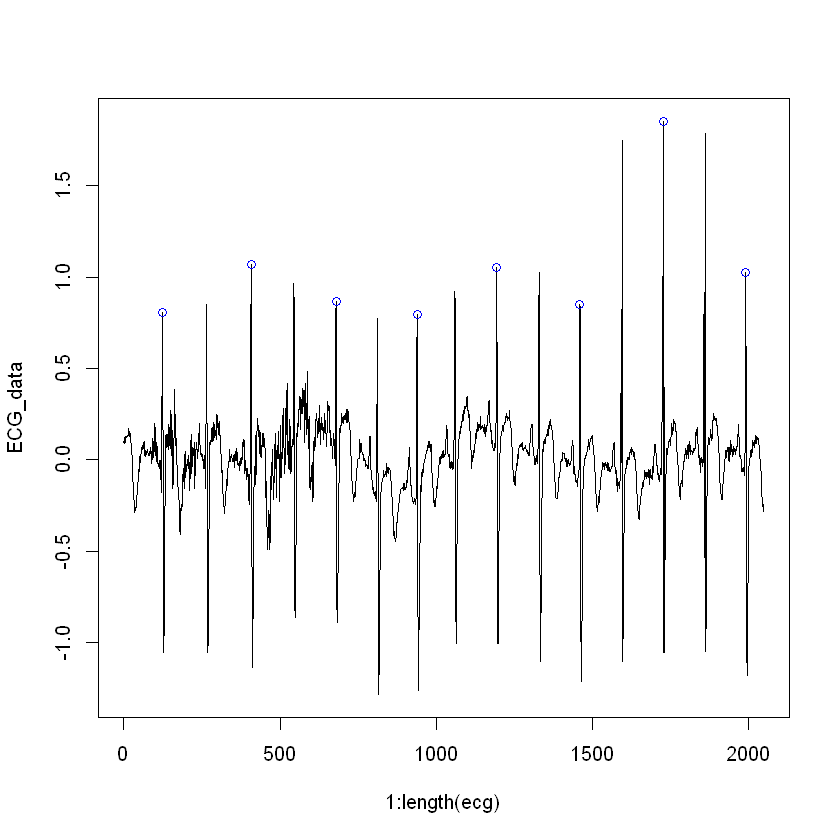

In [16]:
# 피크 간격 조절 인자 추가 (minpeakdistance = 간격)
r2<-findpeaks(as.numeric(ECG_data), threshold=0.5, minpeakdistance=200)
plot(1:length(ecg), ECG_data,'l')
par(new=TRUE)
points(r2[,2],r2[,1],col='blue')

In [17]:
# S파 찾기 -> ECG_data(원본-추세 데이터) 시각화한 그래프에서 찾기
# threshold를 음수로 하면 음수 이상값 모두 출력하므로 ECG_data를 음수화 시키기
s<-findpeaks(as.numeric(-ECG_data), threshold=0.5)
s

1.0547949,127,124,136
1.0553227,269,265,277
1.1348698,412,408,417
0.8658515,548,544,555
0.8932127,683,680,692
1.2861289,815,812,831
1.2643180,942,939,950
1.0073523,1063,1059,1075
1.0061960,1197,1194,1208
1.1027382,1333,1329,1339
1.2160905,1463,1459,1474


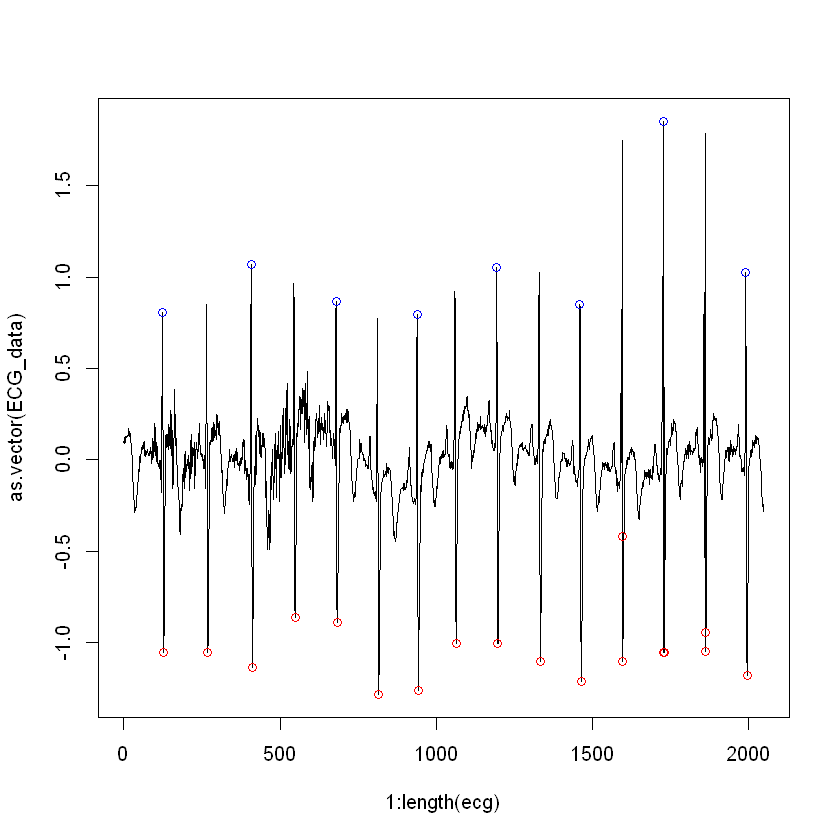

In [18]:
# S피크 추가하기
plot(1:length(ecg), as.vector(ECG_data), 'l')
par(new=TRUE)
points(r2[,2],r2[,1], col='blue')
par(new=TRUE)
# 값에 - 붙이는거 잊지말기!!
points(s[,2],-s[,1], col='red')

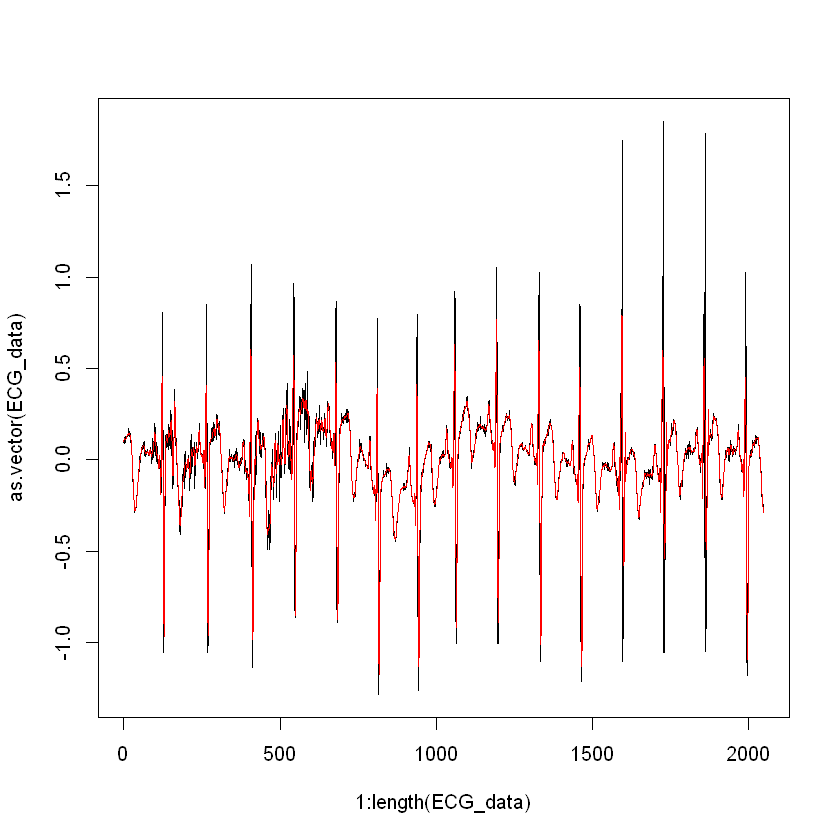

In [19]:
# Q피크 구하기 위해서 먼저 신호를 필터링(이동평균) 한 후 피크를 찾아줘야함!
# 필터링 방법 : savitzky-golay함수 : 구불구불한 고주파수 신호 제거해줌, 근접한 몇개의 데이터를 저차원 다항함수로 fitting
# sgolayfilt(데이터, 차원개수, 윈도잉구간개수)

filt<-sgolayfilt(ECG_data, 7, 21)
plot(1:length(ECG_data), as.vector(ECG_data), 'l')
lines(as.vector(filt),col='red')

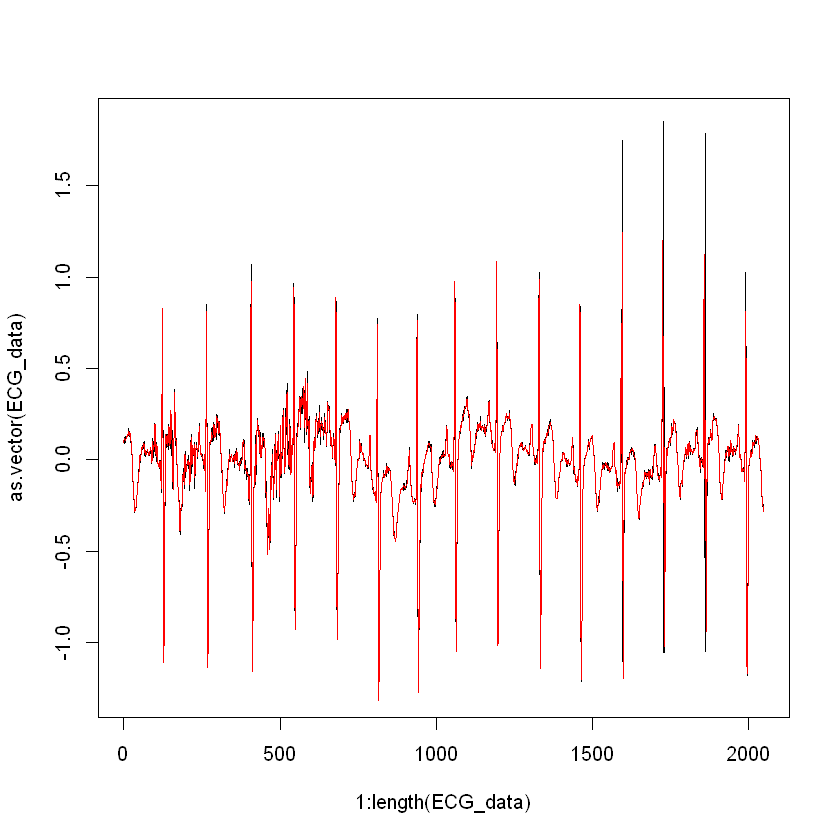

In [35]:
filt<-sgolayfilt(ECG_data, 7, 11)
plot(1:length(ECG_data), as.vector(ECG_data), 'l')
lines(as.vector(filt),col='red')

In [20]:
# filt된 값들과 ECG_data (원본-추세) 값들과 길이 똑같음
length(filt)
length(as.vector(ECG_data))

[1] 2048

[1] 2048

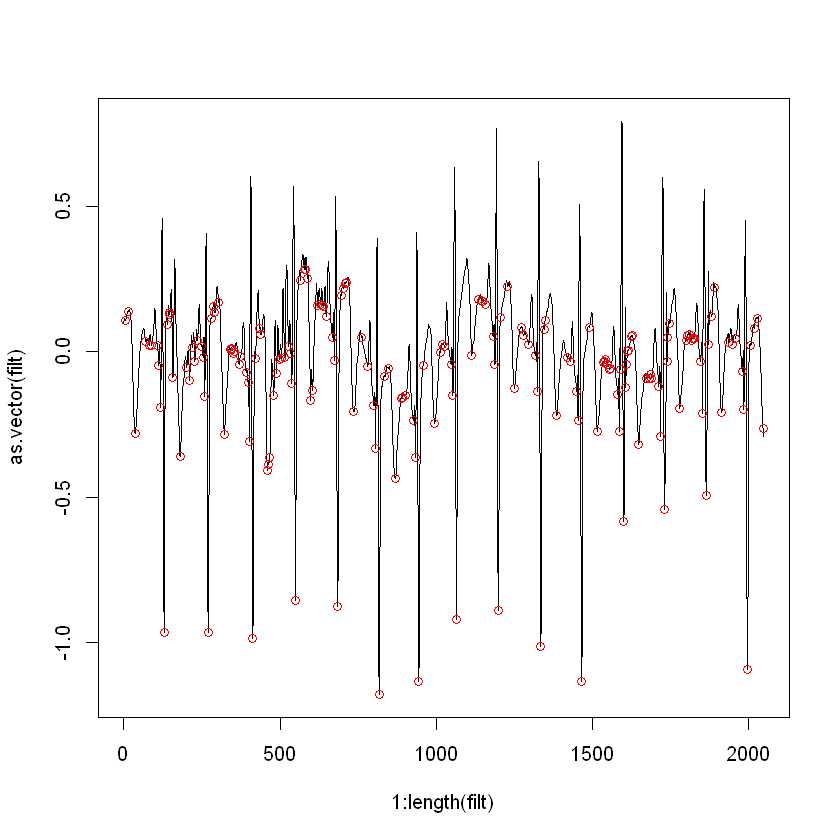

In [21]:
# Q파도 하향파이기 때문에 - 붙여주자!
q<-findpeaks(-as.numeric(filt))
plot(1:length(filt), as.vector(filt),'l')
par(new=TRUE)
points(q[,2],-q[,1], col='red')

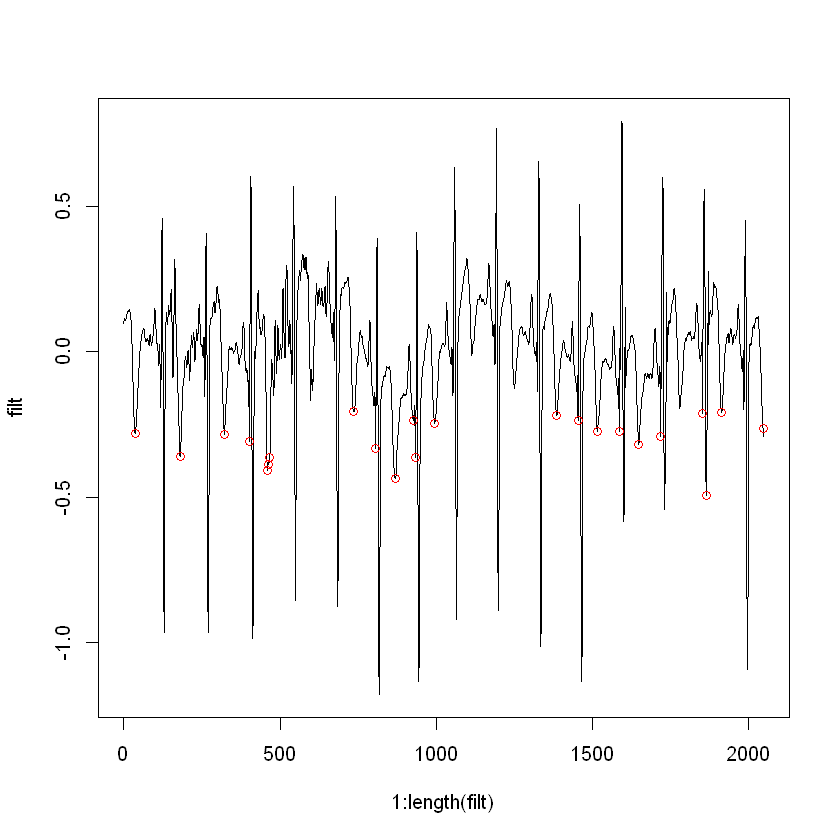

In [22]:
# R에 이어 나타나는 하향파인 S파도 같이 나타나는 것 같으므로 Y값 범위 지정
# 0.2~0.5 사이 지점 PEAK찾기
# 끝에 ,안붙이면 벡터, 붙으면 데이터프레임으로 출력
q2<-q[q[,1]>0.2 & q[,1] <0.5,]
plot(1:length(filt),filt,'l')
par(new=TRUE)
points(q2[,2],-q2[,1], col='red')

In [23]:
q[q[,1]>0.2 & q[,1] <0.5]

[1]    0.2796769    0.3592825    0.2841992    0.3085217    0.4075665
 [6]    0.3867158    0.3631793    0.2067795    0.3314803    0.4362634
[11]    0.2342894    0.3621194    0.2456454    0.2180472    0.2345645
[16]    0.2737313    0.2723240    0.3178846    0.2899793    0.2123841
[21]    0.4931467    0.2078249    0.2640817   37.0000000  181.0000000
[26]  322.0000000  402.0000000  460.0000000  464.0000000  467.0000000
[31]  735.0000000  806.0000000  868.0000000  927.0000000  933.0000000
[36]  995.0000000 1385.0000000 1454.0000000 1515.0000000 1585.0000000
[41] 1647.0000000 1718.0000000 1851.0000000 1863.0000000 1912.0000000
[46] 2045.0000000   19.0000000  164.0000000  306.0000000  399.0000000
[51]  448.0000000  462.0000000  466.0000000  718.0000000  803.0000000
[56]  850.0000000  913.0000000  930.0000000  976.0000000 1365.0000000
[61] 1451.0000000 1497.0000000 1583.0000000 1628.0000000 1715.0000000
[66] 1848.0000000 1857.0000000 1893.0000000 2029.0000000   64.0000000
[71]  198.0000000  338.0000000  407.0000000  462.0000000  466.0000000
[76]  474.0000000  758.0000000  811.0000000  888.0000000  930.0000000
[81]  938.0000000 1011.0000000 1407.0000000 1458.0000000 1534.0000000
[86] 1587.0000000 1668.0000000 1724.0000000 1857.0000000 1870.0000000
[91] 1933.0000000 2046.0000000

In [24]:
q<-q2[1:18,] # R,S파와 비교위해 행 갯수 맞춰주기
length(q)
length(r)
length(s)

[1] 72

[1] 72

[1] 72

In [25]:
head(q,n=2)

0.2796769,37,19,64
0.3592825,181,164,198


In [26]:
avg_riseTime<-mean(r[,2]-q[,2])
avg_fallTime<-mean(s[,2]-r[,2])
avg_riseLevel<-mean(r[,1]-q[,1])
avg_fallLevel<-mean(r[,1]-s[,1])

# Q -> R로 평균 상승시간
avg_riseTime
# R -> S로 평균 하락시간
avg_fallTime
# Q -> R로 평균 상승피크값
avg_riseLevel
# R -> S로 평균 하락피크값
avg_fallLevel

[1] 332.0556

[1] 3.055556

[1] 0.7553472

[1] 0.02303989